In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:
#propagation medium (air)
n1=1

#substrat (glass)
n3=1.5

#Metal (Ag)
n2  = []
k2 = []
l = []
h = 30*e**(-9) #metal thickness

with open("AgIndicesHebert.txt") as file:
    for line in file:
        var = line.split("\t")
        l.append(var[0])
        k2.append(var[1])
        n2.append(var[2])
        
#careful with BOM of UTF file

l = [float(x) for x in l]
n2 = [float(x) for x in n2]
k2 = [float(x) for x in k2]

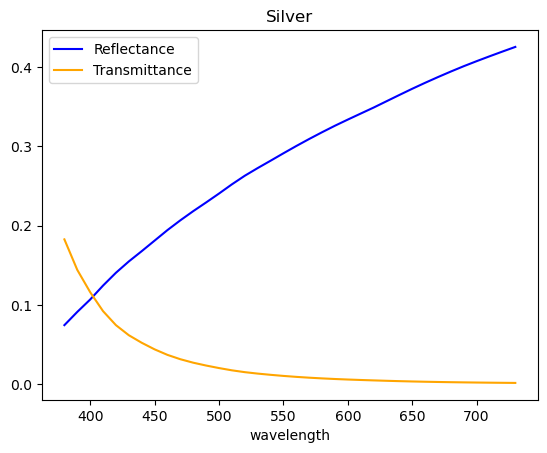

In [3]:
Reflectance = []
Transmittance = []

for i in range(len(l)):
    R = ((n1-n2[i])**2+k2[i]**2)/((n1+n2[i])**2+k2[i]**2)
    T = n3*16*(n2[i]**2+k2[i]**2)/(((n3+n2[i]**2)**2+k2[i]**2)**2)*e**(-8*pi*k2[i]**2*h/(l[i]*e**(-3)))
    Reflectance.append(R)
    Transmittance.append(T)

fig, ax = plt.subplots()
ax.plot(l, Reflectance, color='blue', label='Reflectance')
ax.plot(l, Transmittance, color='orange', label='Transmittance')
ax.set_title("Silver")
ax.set_xlabel("wavelength")
ax.legend()

In [4]:
def reflectivity(l,h):
    Reflectance = []
    for i in range(len(l)):
        R = ((n1-n2[i])**2+k2[i]**2)/((n1+n2[i])**2+k2[i]**2)
        Reflectance.append(R)
    return Reflectance

def transmittivity(l,h):
    Transmittance = []
    for i in range(len(l)):
        T = n3*16*(n2[i]**2+k2[i]**2)/(((n3+n2[i]**2)**2+k2[i]**2)**2)*e**(-8*pi*k2[i]**2*h/(l[i]*e**(-3)))
        Transmittance.append(T)
    return Transmittance

ModuleNotFoundError: No module named 'plotly'

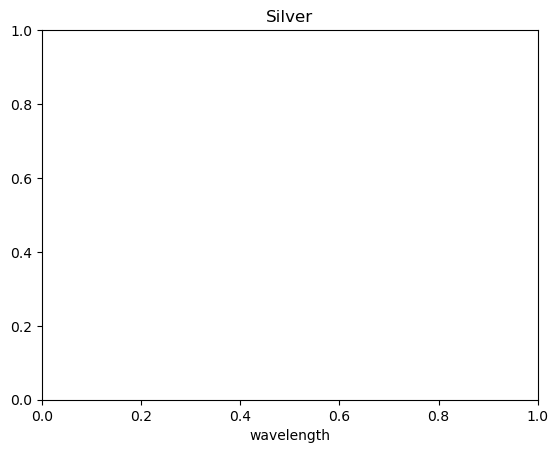

In [5]:
thickness = [w*e**(-9) for w in range(100) if w%10==0 if w>29]

fig, ax = plt.subplots()
ax.set_title("Silver")
ax.set_xlabel("wavelength")

RH = []
TH = []
for h in thickness:
    RH.append(reflectivity(l,h))
    TH.append(transmittivity(l,h))

df = {"wavelength": l, "transmittivity":TH, "reflectivity":RH, "thickness": thickness}

import plotly.express as px
fig = px.line(df, x="wavelength", y="transmittivity", thickness="thickness")
fig.show()
